<a href="https://colab.research.google.com/github/Vamsi-Malineni/CS5691_Machine_Learning_Models/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import math 
from numpy import genfromtxt
import matplotlib.pyplot as plt

dataset=genfromtxt(r'/content/drive/MyDrive/Assignment1 datasets/function2.csv',delimiter=',',skip_header=1)
dataset_1 = np.delete(dataset, 0, axis =1)

X = dataset_1[:,0]       
Y = dataset_1[:,1]


In [58]:
d = 1                                       #For univariate input
lamda = 1                                   # regularization parameter
N_total = len(X)                            #Total Examples in Dataset
N_test = int(0.2*len(X))                    #No. of testing data from X
N_validate = int(0.2*len(X))                #No. of validating data from X
X_validate = X[N_test:(N_test+N_validate)]  #Validation Dataset
X_test = X[0:(N_test)]                      #Test Dataset

# Finding the number of monomials for curve fitting task
D = math.factorial(M + d)//((math.factorial(M))*(math.factorial(d)))

In [78]:
# Function for calculating Basis function phi
def generate_phi(X,N,D):
    phi = np.zeros((N ,D), dtype = float)
    for i in range(N):                               
        for j in range(D):
            phi[i,j] =  np.power( X[i], j)
    return phi

# Task 1

# Without Regularization

In [129]:
def without_regularization( x , y , n, K , d , M ):
  X=x[0]
  X_test=x[1]
  X_validate=x[2]

  Y=y[0]
  Y_test=y[1]
  Y_validate=y[2]

  N_train=n[0]
  N_test=n[1]
  N_validate=n[2]

  # Calculating the number of monomials
  D = math.factorial(M + d)//((math.factorial(M))*(math.factorial(d)))
  
  # Function for calculating 'w' parameters (for each cross validation set) 
  def optimize_para(phi,t):
      A = np.dot(np.transpose(phi),phi)
      B = np.linalg.inv(A)
      pseudo_inv_phi = np.dot(B,np.transpose(phi))
      w_star_intermediate = np.dot(pseudo_inv_phi,t)  #optimal value of parameter
      return w_star_intermediate

  # Function for K-Cross validation (for choosing best 'w' parameters out of K-set of data)
  def optimum_parameter(X,Y,N_train,K,D):
      
      w_star_intermediate = np.zeros((K,D),dtype =float)
      
      error = np.zeros((K,1),dtype = float)
      
      erms = np.zeros((K,1),dtype = float)
      
      for i in range(K):
          phi_train = generate_phi(X[ (N_train*i) : (N_train*(i+1))],N_train,D)  
          
          w_star_intermediate[i,:] = optimize_para(phi_train,Y[(N_train*i):(N_train*(i+1))])    
          #calculating error
          error[i] = 0.5*np.sum(np.power((np.dot(phi_train,w_star_intermediate[i,:]) - Y[(N_train*i):(N_train*(i+1))] ),2)) 
          erms[i] = math.pow(((2*error[i])/N_train),0.5)
      
      a = np.argmin(error)
      
      w_star_optimum = w_star_intermediate[a,:]
      
      return w_star_optimum,erms[a][0]

  #------------------- Output of model(Test Data) -------------------------#
  phi_test = generate_phi(X_test,N_test,D)
  w_star_optimum,er = optimum_parameter(X,Y,N_train,K,D)
  Y_test = np.dot(phi_test,w_star_optimum)

  error = 0.5*np.sum(np.power(( Y_test- Y[0:(N_test)] ),2)) 
  erms = math.pow(((2*error)/N_test),0.5)

  print("degree of polynomial = {}".format(M))
  print("\nTrain Error: ",er)
  print("\nTest Error: ",erms)
  #------------------------------------------------------------------------#

  #--------------- Output of model(Validation Data) -----------------------#   
  phi_validate = generate_phi(X_validate,N_validate,D)
  w_star_optimum,er = optimum_parameter(X,Y,N_train,K,D)
  Y_validate = np.dot(phi_validate,w_star_optimum)

  error_v = 0.5*np.sum(np.power(( Y_validate - Y[N_test:(N_test+N_validate)] ),2)) 
  erms_v = math.pow(((2*error_v)/N_validate),0.5)
  print("\nValidation Error: ",erms_v )
  print("\n")

  X_data = np.linspace(-2,2,N_train)
  phi_data = generate_phi(X_data,N_train,D)

  Y_data = np.dot(phi_data,w_star_optimum)
      
  fig1 = plt.figure(figsize = (10, 7))
  ax1 = fig1.add_subplot(111)
  ax1.scatter(X[0:N_train],Y[0:N_train],c="red",marker ="o",s = 15,alpha = 0.5)
  ax1.plot(X_data,Y_data)
  ax1.set_xlabel("X")
  ax1.set_ylabel("Y")
  plt.title("Without Regularization\n N_train = {} \ndegree of polynomial = {} ".format(N_train,M))
  plt.legend(["Approximated Function","Actual System Output"])
  plt.show()


# With Regularization

In [130]:
def with_regularization( x , y , n, K , d , M , lamda ):
  X=x[0]
  X_test=x[1]
  X_validate=x[2]

  Y=y[0]
  Y_test=y[1]
  Y_validate=y[2]

  N_train=n[0]
  N_test=n[1]
  N_validate=n[2]

  # Calculating the number of monomials
  D = math.factorial(M + d)//((math.factorial(M))*(math.factorial(d)))
  
  # Function for calculating 'w' parameters (for each cross validation set) 
  def optimize_para_reg(phi,t,lamda,D):
      A = np.dot(np.transpose(phi),phi)
      B = np.linalg.inv(A + lamda*np.identity(D,dtype =float))
      pseudo_inv_phi = np.dot(B,np.transpose(phi))
      w_star_intermediate = np.dot(pseudo_inv_phi,t)  #optimal value of parameter
      return w_star_intermediate

  # Function for K-Cross validation (for choosing best 'w' parameters out of K-set of data)
  def optimum_parameter_reg(X,Y,N_train,K,D,lamda):
      w_star_intermediate = np.zeros((K,D),dtype =float)
      error = np.zeros((K,1),dtype = float)
      erms = np.zeros((K,1),dtype = float)
      for i in range(K):
          phi_train = generate_phi(X[ (N_train*i) : (N_train*(i+1))],N_train,D)   
          w_star_intermediate[i,:] = optimize_para_reg(phi_train,Y[(N_train*i):(N_train*(i+1))],lamda,D)    
          #calculating error
          error[i] = 0.5*np.sum(np.power((np.dot(phi_train,w_star_intermediate[i,:]) - Y[(N_train*i):(N_train*(i+1))] ),2))
          erms[i] = math.pow(((2*error[i])/N_train),0.5)
          
      a = np.argmin(error)
      
      w_star_optimum = w_star_intermediate[a,:]
      
      return w_star_optimum,erms[a][0]

  #------------------- Output of model(Test Data) -------------------------#
  phi_test_reg = generate_phi(X_test,N_test,D)
  w_star_reg_optimum,er = optimum_parameter_reg(X,Y,N_train,K,D,lamda)
  Y_test_reg = np.dot(phi_test_reg,w_star_reg_optimum)

  error_reg = 0.5*np.sum(np.power(( Y_test_reg- Y[0:(N_test)] ),2)) 
  erms_reg = math.pow(((2*error_reg)/N_test),0.5)

  print("degree of polynomial = {} & lambda = {}".format(M,lamda))
  print("\nTrain Error: ",er)
  print("\nTest Error: ",erms_reg)
  #------------------------------------------------------------------------#

  #--------------- Output of model(Validation Data) -----------------------#   
  phi_v_reg = generate_phi(X_validate,N_validate,D)
  w_star_reg_optimum_v,er = optimum_parameter_reg(X,Y,N_train,K,D,lamda)
  Y_v_reg = np.dot(phi_v_reg,w_star_reg_optimum_v)

  error_reg_v = 0.5*np.sum(np.power(( Y_v_reg- Y[N_test:(N_test+N_validate)] ),2)) 
  erms_reg_v = math.pow(((2*error_reg_v)/N_validate),0.5)
  print("\nValidation Error: ",erms_reg_v )
  print("\n")

  #-------------------------------------------------------------------------#
  X_data_r = np.linspace(-2,2,N_train)
  phi_data_r = generate_phi(X_data_r,N_train,D)

  Y_data_r = np.dot(phi_data_r,w_star_reg_optimum)
      
  fig2 = plt.figure(figsize = (10, 7))
  ax2 = fig2.add_subplot(111)
  ax2.scatter(X[0:N_train],Y[0:N_train],c="red",marker ="o",s = 15,alpha = 0.5)
  ax2.plot(X_data_r,Y_data_r)
  ax2.set_xlabel("X")
  ax2.set_ylabel("Y")
  plt.title("With Regularization \n N_train = {}  \n lambda = {} \n degree of polynomial = {} ".format(N_train,lamda,M))
  plt.legend(["Approximated Function","Actual System Output"])
  plt.show()


# Plotting results
#### With and Without Regularization




degree of polynomial = 2

Train Error:  0.11237227430546443

Test Error:  9.783454856721564

Validation Error:  10.582939602866057




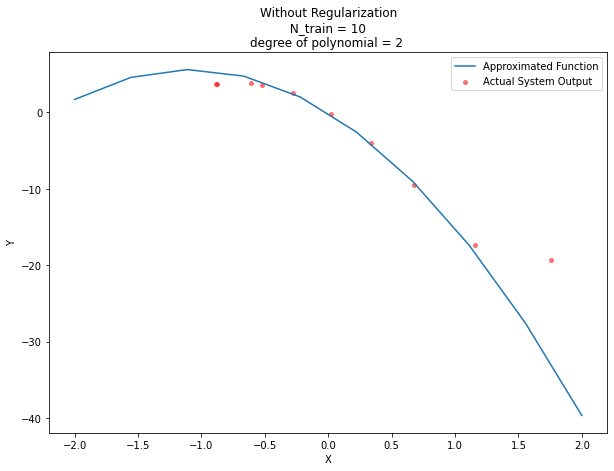



#===================================================================================================#

degree of polynomial = 3

Train Error:  0.05829943742033244

Test Error:  3.913616118044788

Validation Error:  4.291786928093602




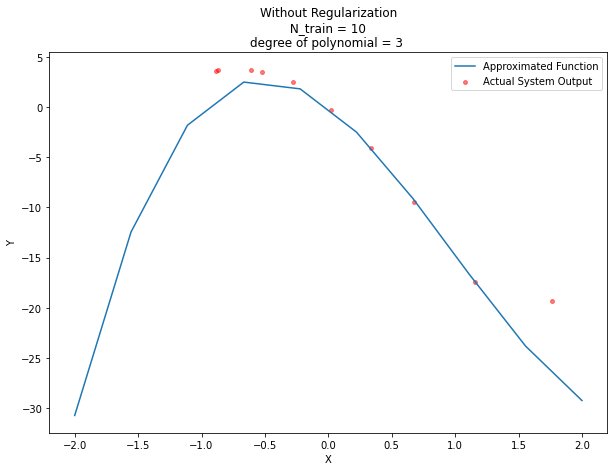



#===================================================================================================#

degree of polynomial = 6

Train Error:  0.0050290985417895916

Test Error:  1.1671398900946655

Validation Error:  1.044484089336306




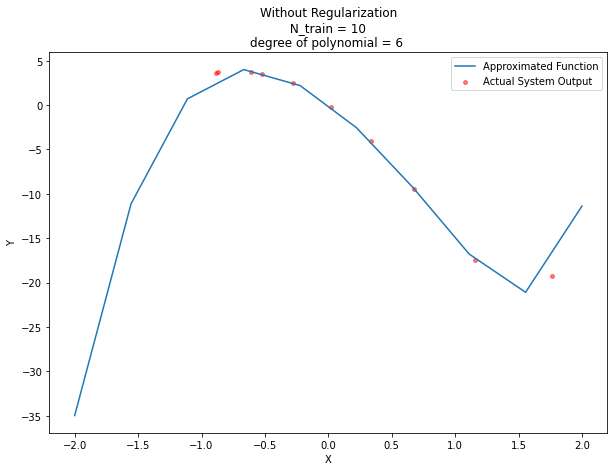



#===================================================================================================#

degree of polynomial = 9

Train Error:  4.769475941184102e-10

Test Error:  2.798182014658171

Validation Error:  3.638350987836242




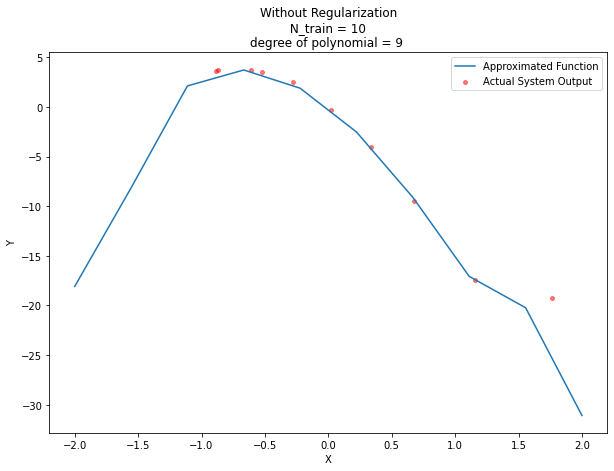

In [138]:
d=1

N_train = 10                                #No. of training examples
K = N_total//N_train                        #K number of sets for K-fold cross validation

x=[X,X_test,X_validate]
y=[Y,Y_test,Y_validate]
n=[N_train,N_test,N_validate]

M=[2,3,6,9]

for m in M:
  print("\n")
  if(m!=2):
    print("#===================================================================================================#\n")
  without_regularization(x,y,n,K,d,m)



degree of polynomial = 2 & lambda = 1

Train Error:  1.1111387666268897

Test Error:  7.368213324578565

Validation Error:  7.968605570609431




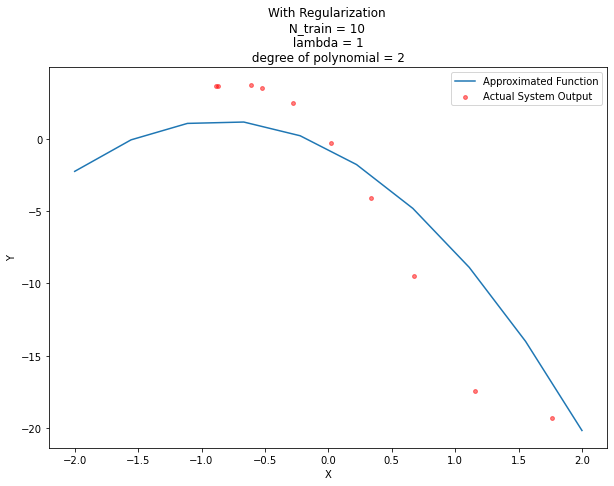



#===================================================================================================#

degree of polynomial = 3 & lambda = 1

Train Error:  1.3699643204442677

Test Error:  15.02767218462336

Validation Error:  16.24618683065553




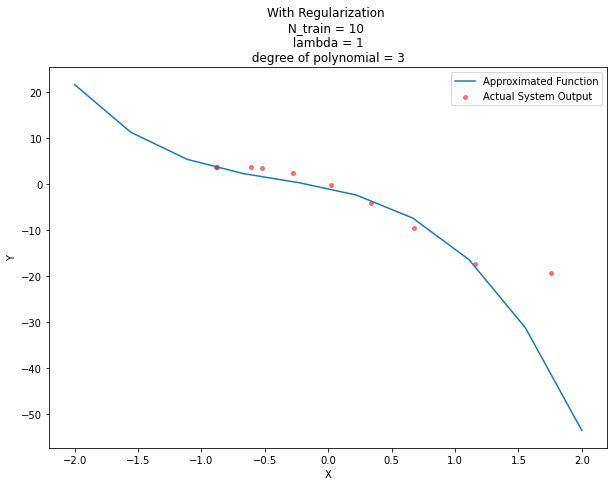



#===================================================================================================#

degree of polynomial = 6 & lambda = 1

Train Error:  0.49036813450494365

Test Error:  12.99619337186437

Validation Error:  15.482184391780613




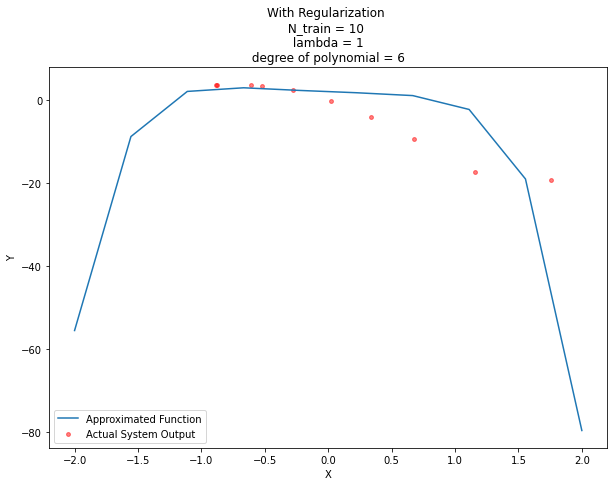



#===================================================================================================#

degree of polynomial = 9 & lambda = 1

Train Error:  0.39855559892368847

Test Error:  26.48759732181512

Validation Error:  32.94899436420101




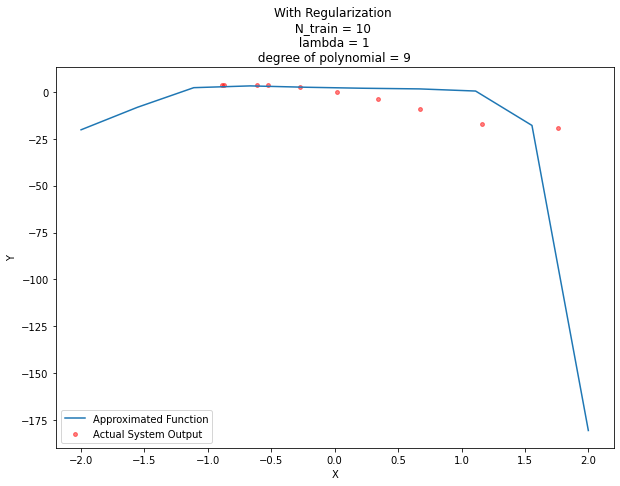

In [141]:
d=1                                         # Univariate data

N_train = 10                                # No. of training examples
K = N_total//N_train                        # K number of sets for K-fold cross validation

x=[X,X_test,X_validate]
y=[Y,Y_test,Y_validate]
n=[N_train,N_test,N_validate]

lamda=1

M=[2,3,6,9]                                 # Degree of polynomial

for m in M:
  print("\n")
  if(m!=2):
    print("#===================================================================================================#\n")
  with_regularization(x,y,n,K,d,m,lamda)